In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [125]:
#use numpy to read in the table from http://www.pas.rochester.edu/~emamajek/EEM_dwarf_UBVIJHK_colors_Teff.txt
#Note i drop spectral types past M8V as they do not have listed B-V values.
star_info=np.genfromtxt("mamajek.txt",dtype=str,skip_footer=33,usecols=[0,1,2,3,4,5,6,7,29])

#print column names
print(star_info[0])

['SpT' 'Teff' 'logT' 'logL' 'Mbol' 'BCv' 'Mv' 'B-V' 'Msun']


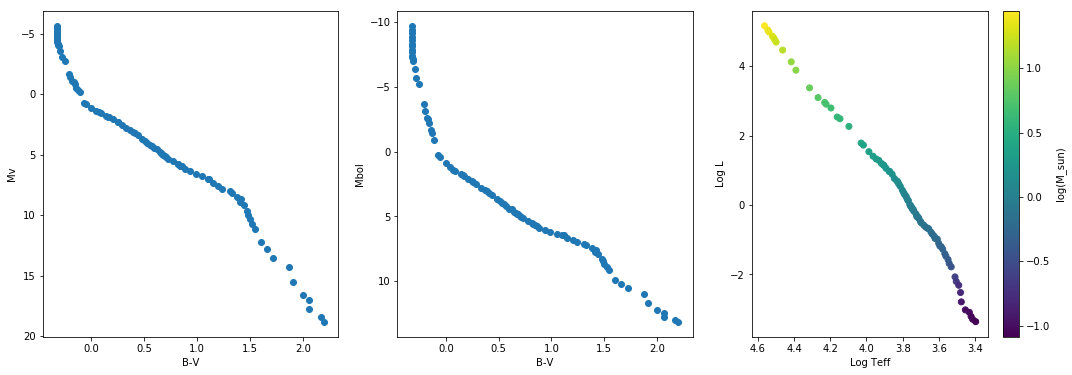

In [147]:
#converting to columns to easier to work with float np arrays
SpT=star_info[:,0][1:]
B_V=star_info[:,7][1:].astype(float)
Mv=star_info[:,6][1:].astype(float)
Teff=star_info[:,1][1:].astype(float)
logL=star_info[:,3][1:].astype(float)
Mbol=star_info[:,4][1:].astype(float)
Msun=star_info[:,8][7:].astype(float)

#lets draw some standard plots
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
plt.scatter(B_V,Mv)
plt.xlabel(star_info[:,7][0])
plt.ylabel(star_info[:,6][0])
plt.gca().invert_yaxis()

plt.subplot(1,3,2)
plt.scatter(B_V,Mbol)
plt.xlabel(star_info[:,7][0])
plt.ylabel(star_info[:,4][0])
plt.gca().invert_yaxis()

plt.subplot(1,3,3)
plt.scatter(np.log10(Teff[6:]),logL[6:],c=np.log10(Msun))
plt.xlabel('Log Teff')
plt.ylabel('Log L')
plt.colorbar(label='log(M_sun)',spacing='uniform')
plt.gca().invert_xaxis()
plt.show()

In [171]:
                    #Printing Intro
h_line='-'*125
print(h_line)
print('\t\tWelcome to my main sequence stellar properties estimator!')
print('\t\tEstimates are based on Eric Mamajek\'s "A Modern Mean Dwarf Stellar Color and Effective Temperature Sequence"')
print('\t\tWhich can be found at http://www.pas.rochester.edu/~emamajek/EEM_dwarf_UBVIJHK_colors_Teff.txt')
print()
print('\t\tPlease Input a B-V color and apparent v magntiude when prompted')
print()
print('\t\t(Note: For reliable results enter a color in the range 2.20 > (B-V) > -0.32)')
print('\t\t(Additionally for reliable mass estimates this range is further limited to B-V > -0.278)')
print(h_line)

                    #Taking Input for B-V and mv
star_clr = float(input('Enter the star\'s B-V color:'))
#star_clr=0.816
star_mv = float(input('Enter the star\'s apparent V magnitude'))
#star_mv=9.8

                    #Part 1 - Determining spectral class
#lets iterate along B-V until we find a value > that of our given
#At that point lets determine whether it's B-V is closer to that value or the previous value
#and assign an approximate spectral type accordingly
for i in range(len(B_V)):
    if(B_V[i]>star_clr):
        if(np.abs(B_V[i]-star_clr)>np.abs(B_V[i-1]-star_clr)):
            star_SpT=SpT[i-1]
            break
        else:
            star_SpT=SpT[i]
            break
print()
print('Approximate spectral type is',star_SpT)


                    #Part 2 - Determing, Mv, dist. modulus, distance, B.C, M_bol and luminosity

#We are given B-V and apparent V-magnitude
#we can first use the Mv and B-V data points to interpolate an absolute mag given color for an MS-Star

star_Mv=np.interp(star_clr,B_V,Mv)     
print('Interpolated absolute Vmag =                ',star_Mv)

#Next lets use this and the given mv to find distance modulus and distance
DM=star_mv-star_Mv
print('Calculated Distance Modulus =               ',DM)
d=10*10**(DM/5)
print('Calculated Distance (pc) =                  ',d)
print()
#Next lets use interpolate again to find an interpolated MBol and the V-mag bolometric correction
star_Mbol=np.interp(star_clr,B_V,Mbol)
print('Interpolated absolute bolometric magntiude =',star_Mbol)
star_BC=star_Mbol-star_Mv
print('Calculated V bolometric correction =        ',star_BC)

#Finally lets calculated luminosity using the distance and Mbol
#taking the Sun's Mbol as a given
sun_Mbol=4.75
star_L=10**((star_Mbol-sun_Mbol)/-2.5)
print('Calculated luminosity (L_sun) =             ',star_L)
print()
                        #Part 3 - Determining Teff and Radius

stefan_boltzmann = 7.132*10**-17 #in units L_sun/(R_sun^2 * K^4)

#lets use the luminosity we just found in part 2 and interpolate to determine a Teff
star_Teff=np.interp(np.log10(star_L),np.flip(logL),np.flip(Teff))
print('Interpolated Teff (K) =',star_Teff)

#Now we can calculate a radius using the below equation and stefan-boltzmann constant
#L=4*pi*R^2*stefan_boltzmann*Teff^4
stefan_boltzmann = 7.132*10**-17 #in units L_sun/(R_sun^2 * K^4)

star_r=np.sqrt(star_L/(4*np.pi*stefan_boltzmann*star_Teff**4))

print('Calculated Radius (R_sun) = ',star_r)

                        #Part 4 - Determing Stellar Mass
#Interpolate along Teff axis to find an estimate for Msun
star_mass=np.interp(star_Teff,np.flip(Teff[6:]),np.flip(Msun))
print('Interpolated Mass (M_sun) = ',star_mass)

-----------------------------------------------------------------------------------------------------------------------------
		Welcome to my main sequence stellar properties estimator!
		Estimates are based on Eric Mamajek's "A Modern Mean Dwarf Stellar Color and Effective Temperature Sequence"
		Which can be found at http://www.pas.rochester.edu/~emamajek/EEM_dwarf_UBVIJHK_colors_Teff.txt

		Please Input a B-V color and apparent v magntiude when prompted

		(Note: For reliable results enter a color in the range 2.20 > (B-V) > -0.32)
		(Additionally for reliable mass estimates this range is further limited to B-V > -0.278)
-----------------------------------------------------------------------------------------------------------------------------


Enter the star's B-V color: 1.2
Enter the star's apparent V magnitude 16



Approximate spectral type is K5.5V
Interpolated absolute Vmag =                 7.6
Calculated Distance Modulus =                8.4
Calculated Distance (pc) =                   478.63009232263846

Interpolated absolute bolometric magntiude = 6.85
Calculated V bolometric correction =         -0.75
Calculated luminosity (L_sun) =              0.1445439770745928

Interpolated Teff (K) = 4330.0
Calculated Radius (R_sun) =  0.6773507375458983
Interpolated Mass (M_sun) =  0.66
